In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/trainings/sales_store_data.csv
/kaggle/input/trainings/naukri_jobs_datascience.csv
/kaggle/input/trainings/narendramodi_tweets.csv
/kaggle/input/trainings/bank-full.csv
/kaggle/input/trainings/restaurant_reviews.csv
/kaggle/input/trainings/Advertising.csv
/kaggle/input/trainings/adult.csv
/kaggle/input/trainings/employees_attrition.csv
/kaggle/input/trainings/odi-batting.csv
/kaggle/input/trainings/sales_data.csv
/kaggle/input/trainings/insurance.csv


In [67]:
df = pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/hotstar.allreviews_Sentiments.csv')
df.head()

,ID,UserName,Created_Date,Reviews,Lower_Case_Reviews,Sentiment_Manual_BP,Sentiment_Manual,Review_Length,DataSource,Year,Month,Date,Sentiment_Polarity
0,1,NaN,8/10/2017,Hh,hh,Negative,Negative,2,Google_PlayStore,2017,8,10,Neutral
1,2,NaN,8/11/2017,No,no,Negative,Negative,2,Google_PlayStore,2017,8,11,Neutral
2,3,asadynwa,8/12/2017,@hotstar_helps during paymnt for premium subsc...,@hotstar_helps during paymnt for premium subsc...,Help,Negative,140,Twitter,2017,8,12,Negative
3,4,jineshroxx,8/11/2017,@hotstartweets I am currently on Jio network a...,@hotstartweets i am currently on jio network a...,Help,Negative,140,Twitter,2017,8,11,Positive
4,5,YaminiSachar,8/5/2017,@hotstartweets the episodes of Sarabhai vs Sar...,@hotstartweets the episodes of sarabhai vs sar...,Help,Negative,140,Twitter,2017,8,5,Neutral


In [68]:
df.shape

(5053, 13)

In [69]:
df[['Reviews','Sentiment_Manual']].head()

,Reviews,Sentiment_Manual
0,Hh,Negative
1,No,Negative
2,@hotstar_helps during paymnt for premium subsc...,Negative
3,@hotstartweets I am currently on Jio network a...,Negative
4,@hotstartweets the episodes of Sarabhai vs Sar...,Negative


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5053 entries, 0 to 5052
Data columns (total 13 columns):
ID                     5053 non-null int64
UserName               4331 non-null object
Created_Date           5053 non-null object
Reviews                5053 non-null object
Lower_Case_Reviews     5053 non-null object
Sentiment_Manual_BP    5053 non-null object
Sentiment_Manual       5053 non-null object
Review_Length          5053 non-null int64
DataSource             5053 non-null object
Year                   5053 non-null int64
Month                  5053 non-null int64
Date                   5053 non-null int64
Sentiment_Polarity     5053 non-null object
dtypes: int64(5), object(8)
memory usage: 513.3+ KB


In [71]:
df['Created_Date'] = pd.to_datetime(df['Created_Date'])

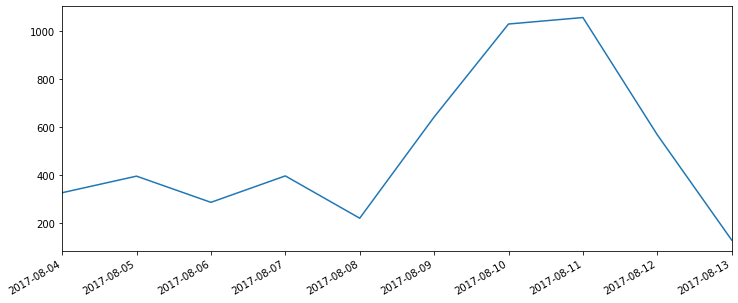

In [72]:
#Plot no. of reviews per day as a line chart
plt.subplots(figsize=(12,5))
df['Created_Date'].value_counts().plot(kind='line')
plt.show()

In [73]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.remove('not') # extend custom stopwords
stemmer = nltk.stem.PorterStemmer() # identify root form of the word

In [74]:
import re
def clean_doc(doc):
    doc = doc.lower()
    doc = re.sub('[^a-z\s]', '', doc)
    words = doc.split(' ')
    words_imp = [stemmer.stem(word) for word in words if word not in stopwords]
    doc_cleaned = ' '.join(words_imp)
    return doc_cleaned

## Split Train and Test Data

In [75]:
train_x, validate_x, train_y, validate_y = train_test_split(df['Reviews'].apply(clean_doc),
                                                            df['Sentiment_Manual'],
                                                            test_size=0.3,
                                                            random_state=1)

## Naive Bayes Classifier

In [76]:
vectorizer = CountVectorizer(min_df=1).fit(train_x)
dtm_train = vectorizer.transform(train_x)
dtm_validate = vectorizer.transform(validate_x)
model = MultinomialNB().fit(dtm_train, train_y)
validate_y_pred = model.predict(dtm_validate)
NB_score=(accuracy_score(validate_y, validate_y_pred))
print(accuracy_score(validate_y, validate_y_pred))

0.746042216358839


## RandomForestClassifier

In [77]:
model = RandomForestClassifier(n_estimators=50, random_state=1).fit(dtm_train, train_y)
validate_y_pred = model.predict(dtm_validate)
rfc_score = accuracy_score(validate_y, validate_y_pred)
print(accuracy_score(validate_y, validate_y_pred))

0.7473614775725593


In [78]:
### Sentiment analysis using VADER package
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [79]:
def get_sentiment(doc):
    comp_score = analyzer.polarity_scores(doc)['compound']
    if(comp_score > 0.2):
        return "Positive"
    elif(comp_score < -0.2):
        return "Negative"
    else:
        return "Neutral"

In [80]:
df['Sentiment_Manual'].value_counts()

Neutral     1738
Positive    1733
Negative    1582
Name: Sentiment_Manual, dtype: int64

In [81]:
analyzer = SentimentIntensityAnalyzer()
df['Sentiment_Vader']= df['Reviews'].apply(get_sentiment)
df['Sentiment_Vader'] = df['Sentiment_Vader'].map({'Positive': 1, 'Negative': 2,'Neutral':3})
df['Sentiment_Manual'] = df['Sentiment_Manual'].map({'Positive': 1, 'Negative': 2,'Neutral':3})
vader_score = accuracy_score(df['Sentiment_Manual'], df['Sentiment_Vader'])
vader_score

0.5576885018800712

In [82]:
NB_score,rfc_score,vader_score

(0.746042216358839, 0.7473614775725593, 0.5576885018800712)

In [123]:
df.groupby(['Created_Date','Sentiment_Manual']).count()['Sentiment_Vader']

107

In [110]:
new_df = df['Sentiment_Vader'].value_counts()

In [121]:
vader_df= pd.DataFrame(df['Sentiment_Vader'].value_counts(),index=[1,2,3])

In [122]:
vader_df

,Sentiment_Vader
1,2236
2,822
3,1995


In [ ]:
plt.subplots(figsize=(18,5))
plt.plot( df['Created_Date'], 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
